## Assignment 7 - Image Processing With a CNN
### Andrew Kang - MSDS 422

To classify our images, we will utilize [1,0] for "dogs" and [0,1] for "cats" as labels.  We have selected our model to train for roughly 5 minutes per model, which is mainly due to time and computation limitations.  Despite this, we expect to be able to evaluate the power of different optimizers and the effect of the learning rate on our convolutional neural network. 

In [72]:
import os, cv2, random
import numpy as np
import pandas as pd

import datetime
from datetime import datetime
from random import shuffle

import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adadelta, RMSprop, Adam, SGD
from keras.losses import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier

### Data  Preparation
In this section, we will look to label our images that are stored in train and test folders respectively.  In addition, we will code the labels and create functions for evaluating the training set.

In [4]:
TRAIN_DIR = "C:\\Users\\Andrew Kang\\2019_OneDrive\\OneDrive\\MSDS\\422\\Week 7\\train"
TEST_DIR = "C:\\Users\\Andrew Kang\\2019_OneDrive\\OneDrive\\MSDS\\422\\Week 7\\test"

In [5]:
IMG_SIZE = 64

In [6]:
def label_image(img):
    world_label = img.split('.')[0]
    if world_label == "dog": return [1,0]
    elif world_label == 'cat' : return [0,1]

In [7]:
def create_training_data():
    training_data = []
    for img in os.listdir(TRAIN_DIR):
        label = label_image(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), label])
    shuffle(training_data)
    np.save("training_data.npy", training_data)
    return training_data

In [9]:
# training_data = create_training_data()

In [10]:
training_data = np.load("training_data.npy")

In [11]:
X_train_data = np.array([i[0] for i in training_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train_data = np.array([i[1] for i in training_data])

### Set Up Train and Test Sets for Cats and Dogs Image Classification
We will utilize an 80/20 split to create our train and test set based on the labeled data that was within the train folder.  Additionally, we will need to normalize the data to achieve best results with our convolutional neural network.

In [12]:
RANDOM_SEED = 1

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size = .2, random_state=RANDOM_SEED)

In [14]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

### Model Preparation

In [16]:
optimizer_dict = {
    "Adam_LR_.001": tf.train.AdamOptimizer(learning_rate = .001),
    "Adam_LR_.0001": tf.train.AdamOptimizer(learning_rate = .0001),
    "RMSProp_LR_.001": tf.train.RMSPropOptimizer(learning_rate = .001),
    "RMSProp_LR_.0001":tf.train.RMSPropOptimizer(learning_rate = .0001)}

In [17]:
optimizers = ["Adam_LR_.001","Adam_LR_.0001","RMSProp_LR_.001","RMSProp_LR_.0001"]

In [22]:
batch_size_list = []
optimizer_list = []
train_acc_list = []
test_acc_list = []
proc_list = []

### Model 1 Training - Adam Optimizer with .001 Learning Rate

In [23]:
print("Optimizer: ", optimizers[0])
model1 = Sequential()
model1.add(Conv2D(32, (2, 2), 
                 activation='relu', 
                 input_shape=X_train.shape[1:],
                 padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(32, (2, 2), 
                 activation='relu', 
                 input_shape=X_train.shape[1:], 
                 padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, 
                activation='relu'))
model1.add(Dense(2, 
                activation='sigmoid'))

model1.compile(optimizer=optimizer_dict[optimizers[0]], loss='binary_crossentropy', metrics=['accuracy'])

start = datetime.now()
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
end = datetime.now()
processing_time = end-start
score_train,acc_train = model1.evaluate(X_train,y_train)
score_test,acc_test = model1.evaluate(X_test,y_test)

print("Training Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("Processing Time: ", processing_time)

optimizer_list.append(optimizers[0])
train_acc_list.append(acc_train)
test_acc_list.append(acc_test)
proc_list.append(processing_time)

Optimizer:  Adam_LR_.001
Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 49s 2ms/step - loss: 0.6937 - acc: 0.4960 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 2/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5002
Epoch 3/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6862 - acc: 0.5383 - val_loss: 0.6570 - val_acc: 0.6336
Epoch 4/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6305 - acc: 0.6498 - val_loss: 0.6106 - val_acc: 0.6726
Epoch 5/5
5000/5000 [==============================] - 3s 696us/step
Training Accuracy:  0.6982
Test Accuracy:  0.683
Processing Time:  0:04:01.874145


### Model 2 Training - Adam Optimizer with .0001 Learning Rate

In [24]:
print("Optimizer: ", optimizers[1])
model2 = Sequential()
model2.add(Conv2D(32, (2, 2), 
                 activation='relu', 
                 input_shape=X_train.shape[1:],
                 padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(32, (2, 2), 
                 activation='relu', 
                 input_shape=X_train.shape[1:], 
                 padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, 
                activation='relu'))
model2.add(Dense(2, 
                activation='sigmoid'))

model2.compile(optimizer=optimizer_dict[optimizers[1]], loss='binary_crossentropy', metrics=['accuracy'])

start = datetime.now()
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
end = datetime.now()
processing_time = end-start
score_train,acc_train = model2.evaluate(X_train,y_train)
score_test,acc_test = model2.evaluate(X_test,y_test)

print("Training Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("Processing Time: ", processing_time)

optimizer_list.append(optimizers[1])
train_acc_list.append(acc_train)
test_acc_list.append(acc_test)
proc_list.append(processing_time)

Optimizer:  Adam_LR_.0001
Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6703 - acc: 0.5917 - val_loss: 0.6620 - val_acc: 0.5851
Epoch 2/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6158 - acc: 0.6687 - val_loss: 0.5986 - val_acc: 0.6776
Epoch 3/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.5952 - acc: 0.6825 - val_loss: 0.5869 - val_acc: 0.6912
Epoch 4/5
20000/20000 [==============================] - 49s 2ms/step - loss: 0.5806 - acc: 0.7006 - val_loss: 0.5761 - val_acc: 0.7015
Epoch 5/5
5000/5000 [==============================] - 4s 716us/step
Training Accuracy:  0.72525
Test Accuracy:  0.7124
Processing Time:  0:04:01.386216


### Model 3 Training - RMS Prop Optimizer with .001 Learning Rate

In [25]:
print("Optimizer: ", optimizers[2])
model3 = Sequential()
model3.add(Conv2D(32, (2, 2), 
                 activation='relu', 
                 input_shape=X_train.shape[1:],
                 padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(32, (2, 2), 
                 activation='relu', 
                 input_shape=X_train.shape[1:], 
                 padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, 
                activation='relu'))
model3.add(Dense(2, 
                activation='sigmoid'))

model3.compile(optimizer=optimizer_dict[optimizers[2]], loss='binary_crossentropy', metrics=['accuracy'])

start = datetime.now()
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
end = datetime.now()
processing_time = end-start
score_train,acc_train = model3.evaluate(X_train,y_train)
score_test,acc_test = model3.evaluate(X_test,y_test)

print("Training Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("Processing Time: ", processing_time)

optimizer_list.append(optimizers[2])
train_acc_list.append(acc_train)
test_acc_list.append(acc_test)
proc_list.append(processing_time)

Optimizer:  RMSProp_LR_.001
Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 49s 2ms/step - loss: 0.6591 - acc: 0.5919 - val_loss: 0.7507 - val_acc: 0.5555
Epoch 2/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.5597 - acc: 0.7110 - val_loss: 0.5255 - val_acc: 0.7391
Epoch 3/5
20000/20000 [==============================] - 47s 2ms/step - loss: 0.5019 - acc: 0.7561 - val_loss: 0.5221 - val_acc: 0.7464
Epoch 4/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.4688 - acc: 0.7776 - val_loss: 0.5017 - val_acc: 0.7647
Epoch 5/5
5000/5000 [==============================] - 3s 689us/step
Training Accuracy:  0.825625
Test Accuracy:  0.776
Processing Time:  0:03:58.964066


### Model 4 Training - RMS Prop Optimizer with .0001 Learning Rate

In [26]:
print("Optimizer: ", optimizers[3])
model4 = Sequential()
model4.add(Conv2D(32, (2, 2), 
                 activation='relu', 
                 input_shape=X_train.shape[1:],
                 padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(32, (2, 2), 
                 activation='relu', 
                 input_shape=X_train.shape[1:], 
                 padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(128, 
                activation='relu'))
model4.add(Dense(2, 
                activation='sigmoid'))

model4.compile(optimizer=optimizer_dict[optimizers[3]], loss='binary_crossentropy', metrics=['accuracy'])

start = datetime.now()
model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
end = datetime.now()
processing_time = end-start
score_train,acc_train = model4.evaluate(X_train,y_train)
score_test,acc_test = model4.evaluate(X_test,y_test)

print("Training Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("Processing Time: ", processing_time)

optimizer_list.append(optimizers[3])
train_acc_list.append(acc_train)
test_acc_list.append(acc_test)
proc_list.append(processing_time)

Optimizer:  RMSProp_LR_.0001
Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6845 - acc: 0.5521 - val_loss: 0.6647 - val_acc: 0.5956
Epoch 2/5
20000/20000 [==============================] - 49s 2ms/step - loss: 0.6367 - acc: 0.6526 - val_loss: 0.6172 - val_acc: 0.6701
Epoch 3/5
20000/20000 [==============================] - 49s 2ms/step - loss: 0.6096 - acc: 0.6757 - val_loss: 0.6106 - val_acc: 0.6689
Epoch 4/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.5967 - acc: 0.6855 - val_loss: 0.5949 - val_acc: 0.6786
Epoch 5/5
5000/5000 [==============================] - 4s 746us/step
Training Accuracy:  0.704425
Test Accuracy:  0.6825
Processing Time:  0:04:04.076358


### Model Performance Analysis

In [27]:
performance_df = pd.DataFrame(columns = ["Optimizer",
                                         "Processing Time", 
                                         "Train Accuracy", 
                                         "Test Accuracy"])

In [28]:
performance_df['Optimizer'] = optimizer_list
performance_df['Processing Time'] = proc_list
performance_df['Train Accuracy'] = train_acc_list
performance_df['Test Accuracy'] =  test_acc_list

In [29]:
performance_df = performance_df.sort_values(by='Test Accuracy',ascending=False)

In [30]:
performance_df

,Optimizer,Processing Time,Train Accuracy,Test Accuracy
2,RMSProp_LR_.001,00:03:58.964066,0.825625,0.7760
1,Adam_LR_.0001,00:04:01.386216,0.725250,0.7124
0,Adam_LR_.001,00:04:01.874145,0.698200,0.6830
3,RMSProp_LR_.0001,00:04:04.076358,0.704425,0.6825


In our model competition, the RMSProp optimizer performed best overall both in-sample and out-of-sample.  What is interesting is that the second best performing model out-of-sample neither shared the optimizer nor the learning rate.   Our models took around 4-5 minutes to train overall, and we were able to achieve > 75% accuracy in terms of classification.  As a result, we would expect that our models would further improve given more computation time overall.

## Model Validation
We willl first process the data in our test set.  Even though there are no labels, we can validate them visually and see what nuances our models are not able to capture.

In [ ]:
def process_test_data():
    testing_data = []
    for img in os.listdir(TEST_DIR):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), np.array(img_num)])
    np.save("testing_data.npy", testing_data)
    return testing_data    

In [32]:
# test_data = process_test_data()
test_data = np.load("testing_data.npy")

In [73]:
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

## Example 1 - Focusing on the Bigger Picture

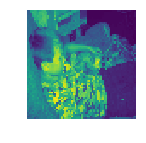

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize =[2,2])
plot_color_image(test_data[50][0])
plt.show()
plt.tight_layout()

In [43]:
model1.predict(test_data[50][0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

array([[1., 0.]], dtype=float32)

In [44]:
model2.predict(test_data[50][0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

array([[1., 0.]], dtype=float32)

In [45]:
model3.predict(test_data[50][0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

array([[1., 0.]], dtype=float32)

In [46]:
model4.predict(test_data[50][0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

array([[1., 0.]], dtype=float32)

All of our models were able to identify that there was indeed a dog in this picture.  This is despite the fact that the focus is actually on the boy holding the dog.  This shows some promise as our models appear to be somewhat robust against multiple objects in the image.

## Example 2 - Focusing on the Face and Ears

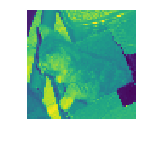

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize =[2,2])
plot_color_image(test_data[1300][0])
plt.show()
plt.tight_layout()

In [60]:
model1.predict(test_data[1300][0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

array([[1., 0.]], dtype=float32)

In [61]:
model2.predict(test_data[1300][0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

array([[1., 0.]], dtype=float32)

In [62]:
model3.predict(test_data[1300][0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

array([[0., 1.]], dtype=float32)

In [63]:
model4.predict(test_data[1300][0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

array([[1., 0.]], dtype=float32)

In this example, we see that 3 of the 4 models incorrectly classified this as a dog.  Our best-performing model got it right, but it also likely points to a key reason why our RMSProp model with .001 learning rate outperforms.  In this picture, there is no face and the ears are not distinct.  This means that likely our third model is picking up on the animal's features in the body area.

### Conclusion
Our recommendtion for the management problem based on our constrained image classification trainig is to go with our third model, RMSProp with .001 learning rate.  While we were not able to achieve > 90% accuracy, we were able to see several examples of what features the models may be narrowing in on.  Given more computate and time, we see evidence that the model results would further converge and further improve overall.